In [1]:
# 評估 MLP 神經元參數 

In [2]:
from utils import *

import datetime
import json
import math
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd
import re
import scikitplot as skplt
import seaborn as sns
import shutil
import sys    


In [3]:
# 初始化繪布
set_default_figure()


In [4]:
# 取得今日日期
today = datetime.date.today().strftime('%Y%m%d')

# 設定目錄名稱 - 不同 test_size 差別
plot_type_name = 'mlp_gridsearch'


In [5]:
# 工作區
workspace = os.path.join("./plot", today, plot_type_name)

try:
    shutil.rmtree(workspace)
except:
    pass

os.makedirs(workspace)

def getImageName(filename: str):
    """
    取得圖片檔保存路徑
    """
    return os.path.join( workspace, filename )
    

In [6]:
gridsearch = load_pickles('mlp_gridsearch')

Loading pickle: ./pickle/mlp_gridsearch-20200124.pickle


In [7]:
# 將回傳結果中的 key 
keys = list(gridsearch.keys())
keys.sort(reverse=True)


In [8]:
# 取出各參數驗證資料成績
scores = {}
scores_tmp = {}

for key in keys:
    params = gridsearch[key]['params']
    test_scores = gridsearch[key]['mean_test_score']
    for idx in range(len(params)):
        scores[test_scores[idx]] = params[idx]
        scores_tmp[str(params[idx])] = test_scores[idx]


In [9]:
columns = ['param', 'mean_test_score']

scores_df = pd.DataFrame(columns=columns)
for key in keys:
    params = gridsearch[key]['params']
    test_scores = gridsearch[key]['mean_test_score']
    for idx in range(len(params)):
        score = {'param': str(params[idx]), 'mean_test_score': test_scores[idx]}
        scores_df = scores_df.append( score, ignore_index=True)
        
scores_df.set_index('param', inplace=True)

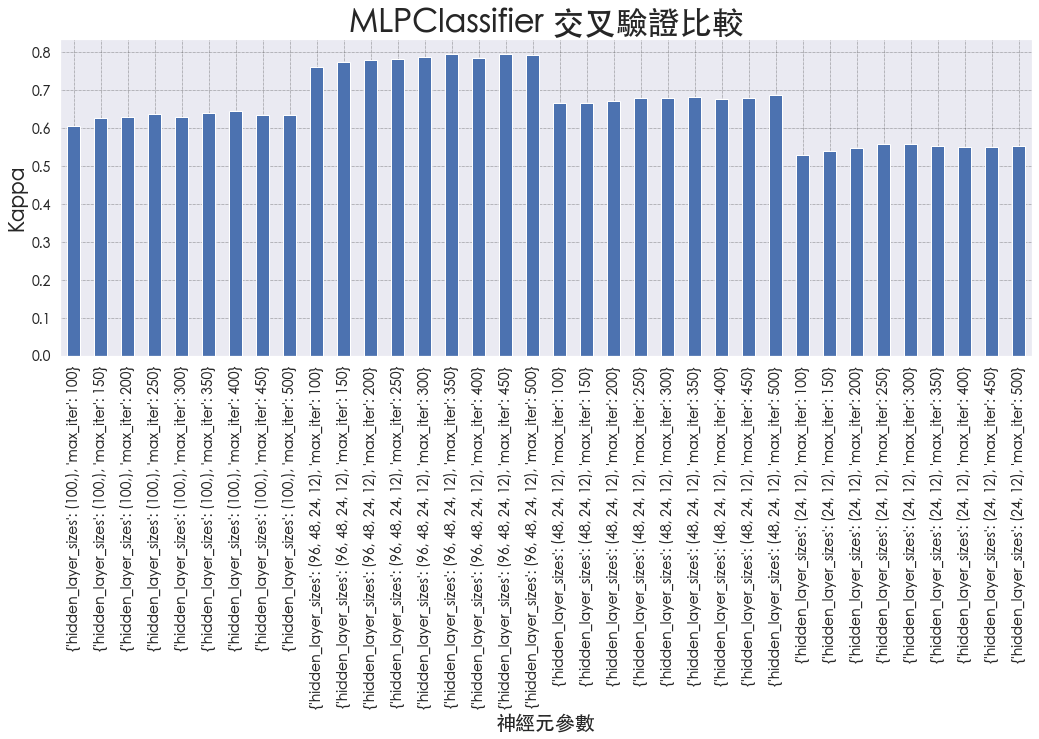

In [10]:
# 繪製所有參數比較
scores_df.plot(kind='bar', figsize=(15,11), legend=False)


plt.title("MLPClassifier 交叉驗證比較", fontsize=32)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Kappa', fontsize=20)
plt.xlabel('神經元參數', fontsize=20)

plt.subplots_adjust(bottom=0.5, top=0.9, left=0.07, right=0.97, hspace=0, wspace=0)

imgName = getImageName('mlp-full-rank.png')
plt.savefig(imgName)

plt.show()
plt.close()


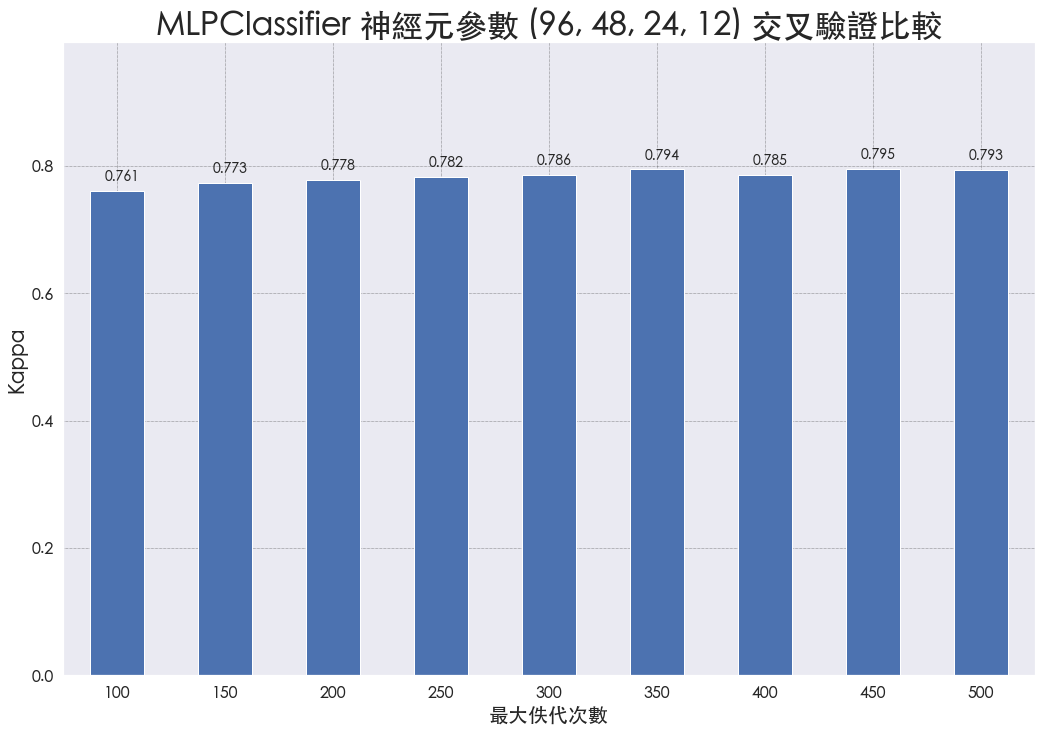

In [11]:


# 取得 hidden_layer_sizes = (96, 48, 24, 12) 的驗證成績並重新繪圖
scores_df.reset_index(inplace=True)
filter = ["(96, 48, 24, 12)" in param for param in scores_df['param']]
best_params_df = scores_df[filter]
best_params_df = best_params_df.copy()
best_params_df['max_iter'] = best_params_df['param'].str.extract("'max_iter': (\d+)")
best_params_df.drop('param', axis=1, inplace=True)
best_params_df.set_index('max_iter', inplace=True)


ax = best_params_df.plot(kind='bar', 
                         figsize=(15, 11), 
                         legend = False, 
                         rot = 0,
                         ylim=(0, best_params_df['mean_test_score'].max() + 0.2))

# 標示績效 
for idx, label in enumerate(list(best_params_df.index)): 
    for name in best_params_df.columns:
        value = np.round(best_params_df.iloc[idx][name], 3)
        ax.annotate(f'{value:.03f}',
                    (idx, value),
                     xytext=(5, 10), 
                     textcoords='offset points',
                    ha='center',
                    fontsize=14
                   )



plt.title("MLPClassifier 神經元參數 (96, 48, 24, 12) 交叉驗證比較", fontsize=32)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('Kappa', fontsize=20)
plt.xlabel('最大佚代次數', fontsize=20)

plt.subplots_adjust(bottom=0.1, top=0.9, left=0.07, right=0.97, hspace=0, wspace=0)

imgName = getImageName('mlp-opt-rank.png')
plt.savefig(imgName)
